In [1]:
%pip install discopula

Note: you may need to restart the kernel to use updated packages.


> Make sure to have discopula's latest version installed using `pip`. More information about the latest version can be found at https://pypi.org/project/discopula/

In [30]:
import numpy as np
from discopula import (
    bootstrap_ccram,
    permutation_test_ccram,
    bootstrap_predict_category_summary
)
from discopula import GenericCheckerboardCopula

# 2-Dimensional Case 

### Create Sample Contingency Table and Initialize the GenericCheckerboardCopula

In the case of initialization of a `GenericCheckerboardCopula` object with a contingency table (`np.array(np.array(...))`), the axis indexing defaults to the outermost starting with 0. In this case of a 2D contingency table, `axis = 0` has 5 categories and `axis = 1` has 3 categories. According to the JMA2021 paper, we have $X_1$ at `axis = 0` and $X_2$ at `axis = 1`.

In [3]:
contingency_table = np.array([
    [0, 0, 20],
    [0, 10, 0],
    [20, 0, 0],
    [0, 10, 0],
    [0, 0, 20]
])
copula = GenericCheckerboardCopula.from_contingency_table(contingency_table)
print(f"Shape of the inferred joint probability matrix P: {copula.P.shape}")
print(f"Probability matrix P:\n{copula.P}")

Shape of the inferred joint probability matrix P: (5, 3)
Probability matrix P:
[[0.    0.    0.25 ]
 [0.    0.125 0.   ]
 [0.25  0.    0.   ]
 [0.    0.125 0.   ]
 [0.    0.    0.25 ]]


### Bootstrapping CCRAM & SCCRAM Metrics

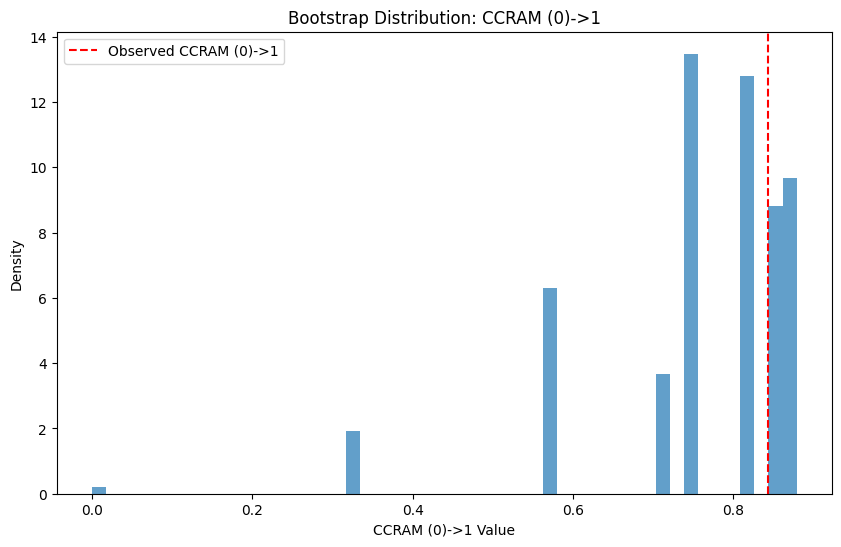

In [4]:
ccram_result = bootstrap_ccram(
    gen_copula=copula,
    from_axes=[0],
    to_axis=1,
    confidence_level=0.95,
    method="percentile",
    n_resamples=9999
)

In [5]:
print(f"Metric Name: {ccram_result.metric_name}")
print(f"Observed Value: {ccram_result.observed_value:.4f}")
print(f"95% CI: ({ccram_result.confidence_interval[0]:.4f}, {ccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {ccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(ccram_result.bootstrap_distribution)}")

Metric Name: CCRAM (0)->1
Observed Value: 0.8438
95% CI: (0.3281, 0.8789)
Standard Error: 0.1307
Bootstrap Distribution: <class 'numpy.ndarray'>


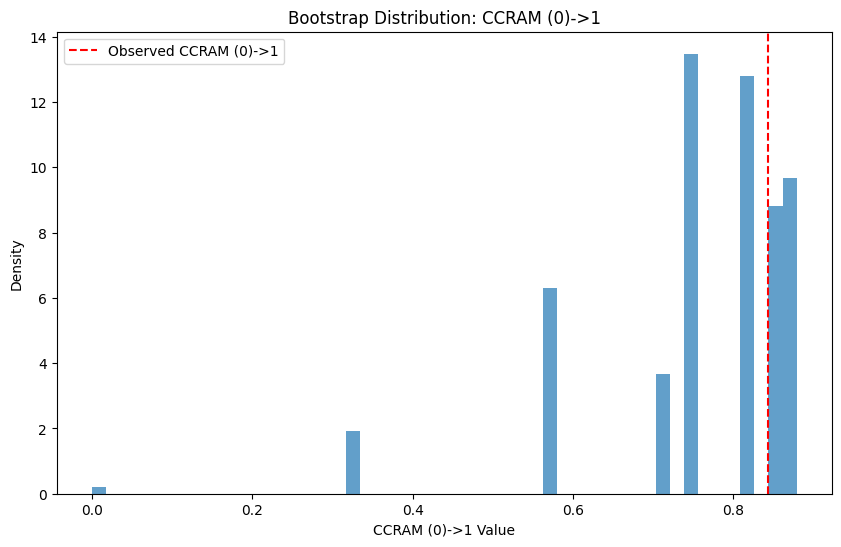

In [6]:
ccram_result.histogram_fig

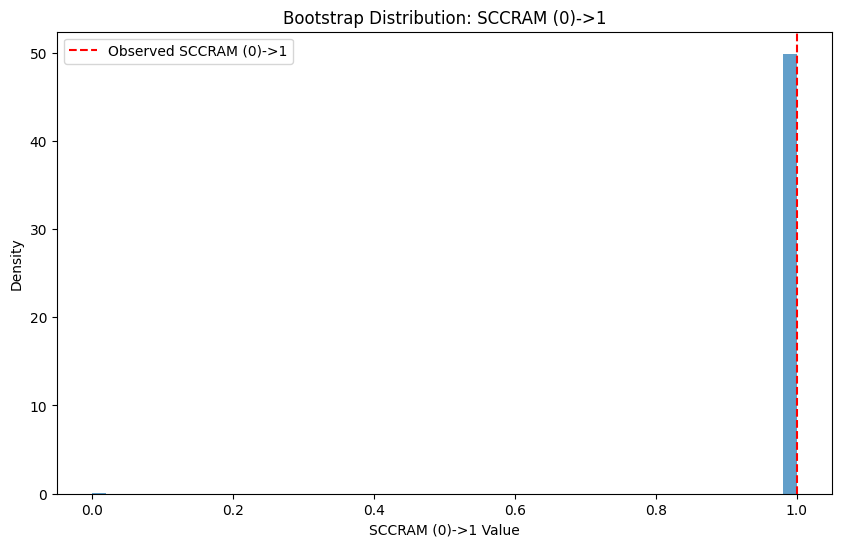

In [7]:
sccram_result = bootstrap_ccram(
    gen_copula=copula,
    from_axes=[0],
    to_axis=1,
    scaled=True,
    confidence_level=0.95,
    method="percentile",
    n_resamples=9999
)

In [8]:
print(f"Metric Name: {sccram_result.metric_name}")
print(f"Observed Value: {sccram_result.observed_value:.4f}")
print(f"95% CI: ({sccram_result.confidence_interval[0]:.4f}, {sccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {sccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(sccram_result.bootstrap_distribution)}")

Metric Name: SCCRAM (0)->1
Observed Value: 1.0000
95% CI: (1.0000, 1.0000)
Standard Error: 0.0519
Bootstrap Distribution: <class 'numpy.ndarray'>


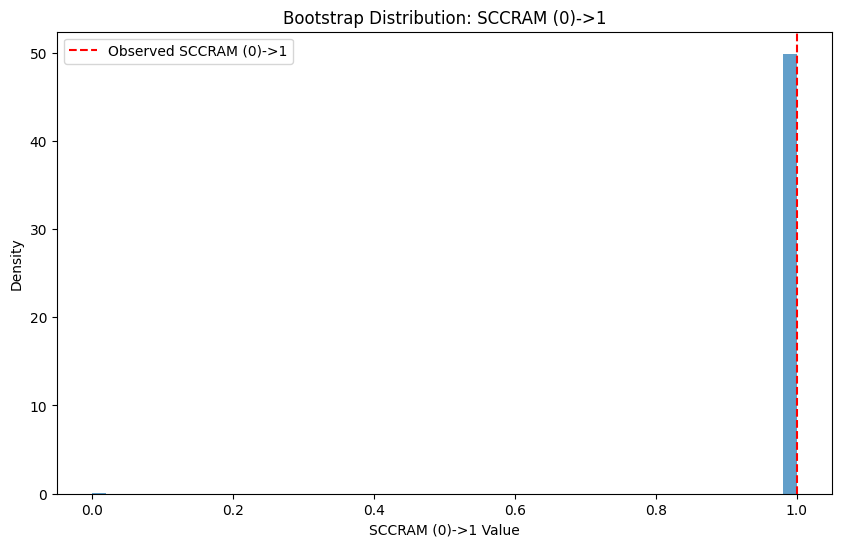

In [9]:
sccram_result.histogram_fig

### Bootstrap Prediction of Categories through Checkerboard Copula Regression

In [10]:
prediction_matrix = bootstrap_predict_category_summary(
    gen_copula=copula,
    from_axes=[0],
    from_axes_names=["X"],
    to_axis=1,
    to_axis_name="Y",
    n_resamples=99999
)
print("\nPrediction Matrix:")
prediction_matrix

/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/numpy/_core/_methods.py:216: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



Prediction Summary (% of bootstrap samples)
--------------------------------------------------------------------------------
       X=0    X=1    X=2    X=3    X=4
Y=0  10.0%   2.3%  90.2%  31.9%   2.3%
Y=1   0.0%  65.5%   7.5%  67.7%   7.8%
Y=2  90.0%  32.2%   2.3%   0.4%  90.0%
--------------------------------------------------------------------------------

Prediction Matrix:


,X=0,X=1,X=2,X=3,X=4
Y=0,10.0121,2.264023,90.150902,31.909319,2.277023
Y=1,0.0000,65.500655,7.536075,67.680677,7.770078
Y=2,89.9879,32.235322,2.313023,0.410004,89.952900


### Permutation Testing for CCRAM & SCCRAM Metrics

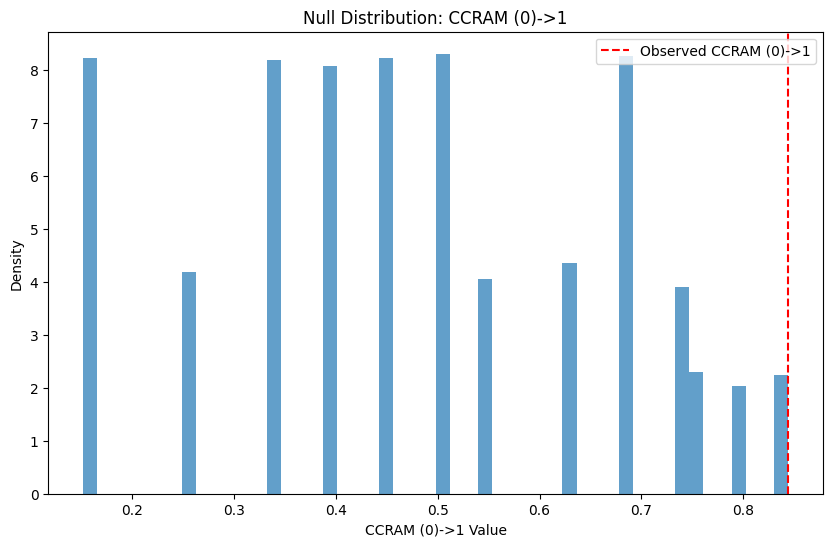

In [11]:
perm_result = permutation_test_ccram(
    gen_copula=copula,
    from_axes=[0],
    to_axis=1,
    alternative='greater',
    n_resamples=9999
)

In [12]:
print(f"Metric Name: {perm_result.metric_name}")
print(f"Observed Value: {perm_result.observed_value:.4f}")
print(f"P-Value: {perm_result.p_value:.4f}")
print(f"Null Distribution: {type(perm_result.null_distribution)}")

Metric Name: CCRAM (0)->1
Observed Value: 0.8438
P-Value: 0.0310
Null Distribution: <class 'numpy.ndarray'>


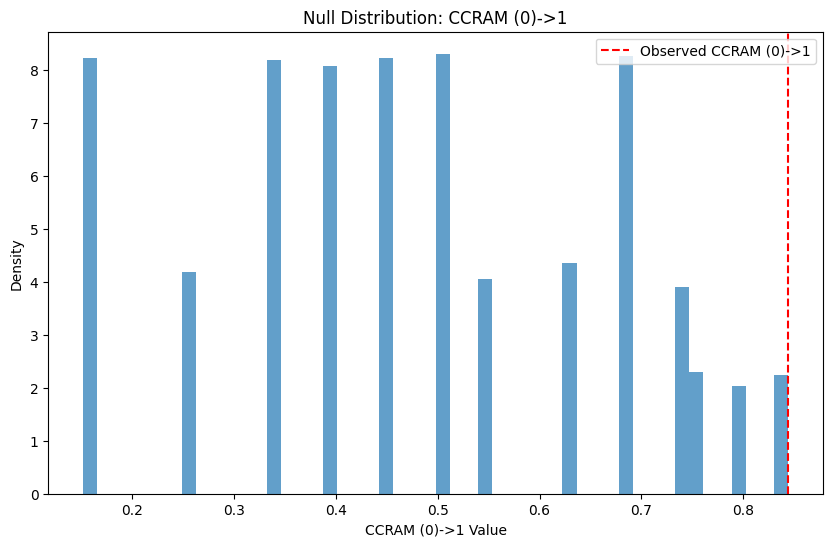

In [13]:
perm_result.histogram_fig

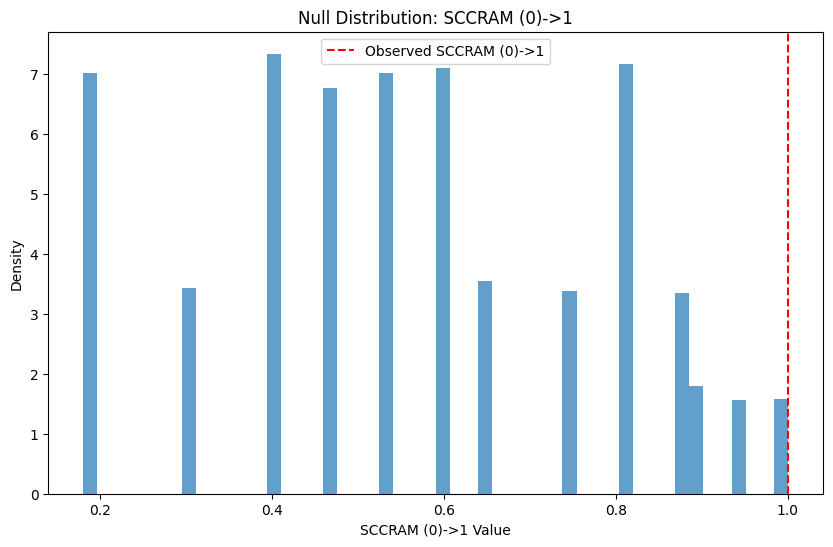

In [14]:
scaled_perm_result = permutation_test_ccram(
    gen_copula=copula,
    from_axes=[0],
    to_axis=1,
    scaled=True,
    alternative='greater',
    n_resamples=9999
)

In [15]:
print(f"Metric Name: {scaled_perm_result.metric_name}")
print(f"Observed Value: {scaled_perm_result.observed_value:.4f}")
print(f"P-Value: {scaled_perm_result.p_value:.4f}")
print(f"Null Distribution: {type(scaled_perm_result.null_distribution)}")

Metric Name: SCCRAM (0)->1
Observed Value: 1.0000
P-Value: 0.0259
Null Distribution: <class 'numpy.ndarray'>


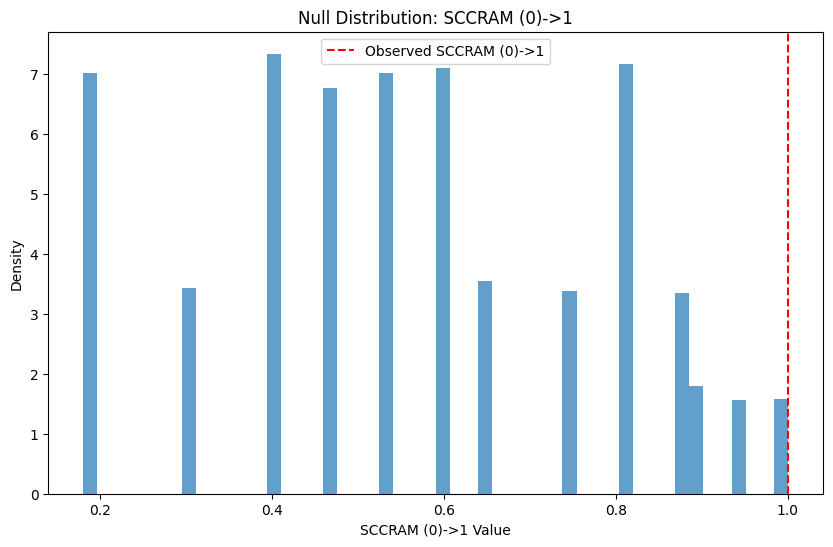

In [16]:
scaled_perm_result.histogram_fig

# 4-Dimensional Case (Real Data Analysis from JMA2021)

### Create Sample Data in Cases Form and Initialize the GenericCheckerboardCopula

In the case of initialization of a `GenericCheckerboardCopula` object with cases data (`np.array(np.array())`), the axis indexing defaults to the outermost starting with 0. In this case of 4D cases, as mentioned by the `shape` parameter: `axis = 0` has 2 categories, `axis = 1` has 3 categories, `axis = 2` has 2 categories, and `axis = 3` has 6 categories. According to the JMA2021 paper, we have $X_1$ at `axis = 0`, $X_2$ at `axis = 1`, $X_3$ at `axis = 2`, and $X_4$ at `axis = 3`.

In [17]:
real_cases_data = np.array([
    # RDA Row 1
    [0,2,0,1],[0,2,0,4],[0,2,0,4],
    [0,2,0,5], [0,2,0,5],[0,2,0,5],[0,2,0,5],
    # RDA Row 2
    [0,2,1,3],[0,2,1,4],[0,2,1,4],[0,2,1,4],
    # RDA Row 3
    [0,1,0,1],[0,1,0,1],[0,1,0,2],[0,1,0,2],[0,1,0,2],
    [0,1,0,4],[0,1,0,4],[0,1,0,4],[0,1,0,4],[0,1,0,4],[0,1,0,4],
    [0,1,0,5],[0,1,0,5],[0,1,0,5],[0,1,0,5],
    # RDA Row 4
    [0,1,1,1],[0,1,1,3],[0,1,1,3],[0,1,1,5],
    # RDA Row 5
    [0,0,0,4],[0,0,0,4],[0,0,0,5],[0,0,0,5],
    # RDA Row 6
    [0,0,1,2],[0,0,1,3],[0,0,1,4],[0,0,1,4],[0,0,1,4],
    # RDA Row 7
    [1,2,0,2],[1,2,0,2],[1,2,0,2],[1,2,0,4],[1,2,0,5],[1,2,0,5],
    # RDA Row 8
    [1,2,1,1],[1,2,1,4],[1,2,1,4],[1,2,1,4],
    # RDA Row 9
    [1,1,0,1],[1,1,0,1],[1,1,0,1],[1,1,0,2],[1,1,0,2],[1,1,0,2],[1,1,0,2],
    [1,1,0,3],[1,1,0,3],[1,1,0,3],[1,1,0,3],[1,1,0,3],
    [1,1,0,4],[1,1,0,4],[1,1,0,4],[1,1,0,4],[1,1,0,4],[1,1,0,4],
    [1,1,0,5],[1,1,0,5],
    # RDA Row 10
    [1,1,1,0],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],
    [1,1,1,2],[1,1,1,2],[1,1,1,2],[1,1,1,2],
    [1,1,1,3],[1,1,1,3],[1,1,1,3],[1,1,1,5],
    # RDA Row 11
    [1,0,0,0],[1,0,0,0],[1,0,0,1],[1,0,0,1],[1,0,0,2],
    [1,0,0,3],[1,0,0,3],[1,0,0,3],[1,0,0,3],[1,0,0,3],
    [1,0,0,4],[1,0,0,4],
    # RDA Row 12
    [1,0,1,0],[1,0,1,0],[1,0,1,2],[1,0,1,2],
    [1,0,1,3],[1,0,1,3],[1,0,1,3]
])
rda_copula = GenericCheckerboardCopula.from_cases(cases=real_cases_data, shape=(2,3,2,6))
print(f"Shape of the inferred joint probability matrix P: {rda_copula.P.shape}")
print(f"Probability matrix P:\n{rda_copula.P}\n")
print(f"Marginal pdfs:\n{rda_copula.marginal_pdfs}\n")
print(f"Marginal cdfs:\n{rda_copula.marginal_cdfs}")

Shape of the inferred joint probability matrix P: (2, 3, 2, 6)
Probability matrix P:
[[[[0.         0.         0.         0.         0.01980198 0.01980198]
   [0.         0.         0.00990099 0.00990099 0.02970297 0.        ]]

  [[0.         0.01980198 0.02970297 0.         0.05940594 0.03960396]
   [0.         0.00990099 0.         0.01980198 0.         0.00990099]]

  [[0.         0.00990099 0.         0.         0.01980198 0.03960396]
   [0.         0.         0.         0.00990099 0.02970297 0.        ]]]


 [[[0.01980198 0.01980198 0.00990099 0.04950495 0.01980198 0.        ]
   [0.01980198 0.         0.01980198 0.02970297 0.         0.        ]]

  [[0.         0.02970297 0.03960396 0.04950495 0.05940594 0.01980198]
   [0.00990099 0.03960396 0.03960396 0.02970297 0.         0.00990099]]

  [[0.         0.         0.02970297 0.         0.00990099 0.01980198]
   [0.         0.00990099 0.         0.         0.02970297 0.        ]]]]

Marginal pdfs:
{0: array([0.38613861, 0.6138613

In [18]:
rda_contingency_table = rda_copula.contingency_table
print(f"Shape of the inferred contingency table: {rda_contingency_table.shape}")
print(f"Contingency Table:\n{rda_contingency_table}")

Shape of the inferred contingency table: (2, 3, 2, 6)
Contingency Table:
[[[[0 0 0 0 2 2]
   [0 0 1 1 3 0]]

  [[0 2 3 0 6 4]
   [0 1 0 2 0 1]]

  [[0 1 0 0 2 4]
   [0 0 0 1 3 0]]]


 [[[2 2 1 5 2 0]
   [2 0 2 3 0 0]]

  [[0 3 4 5 6 2]
   [1 4 4 3 0 1]]

  [[0 0 3 0 1 2]
   [0 1 0 0 3 0]]]]


### Bootstrapping CCRAM & SCCRAM Metrics

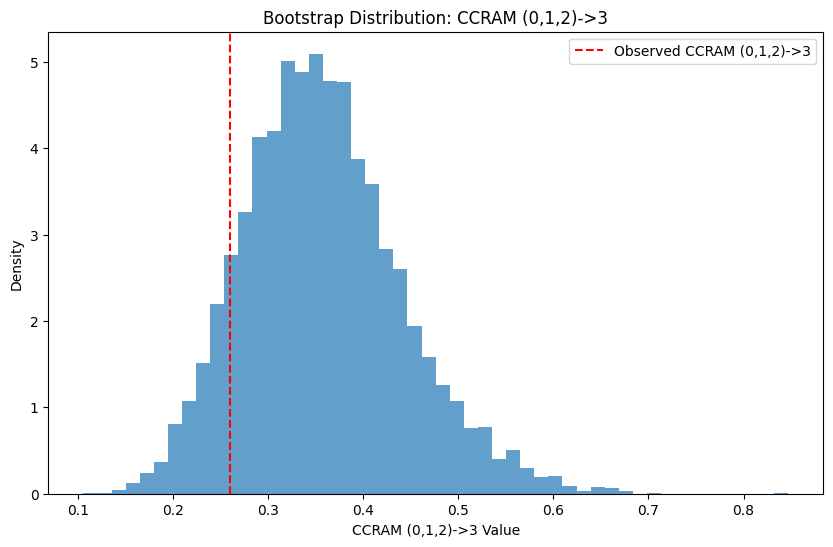

In [19]:
rda_ccram_result = bootstrap_ccram(
    gen_copula=rda_copula,
    from_axes=[0, 1, 2],
    to_axis=3,
    confidence_level=0.95,
    method="percentile",
    n_resamples=9999
)

In [20]:
print(f"Metric Name: {rda_ccram_result.metric_name}")
print(f"Observed Value: {rda_ccram_result.observed_value:.4f}")
print(f"95% CI: ({rda_ccram_result.confidence_interval[0]:.4f}, {rda_ccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {rda_ccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(rda_ccram_result.bootstrap_distribution)}")

Metric Name: CCRAM (0,1,2)->3
Observed Value: 0.2604
95% CI: (0.2110, 0.5433)
Standard Error: 0.0834
Bootstrap Distribution: <class 'numpy.ndarray'>


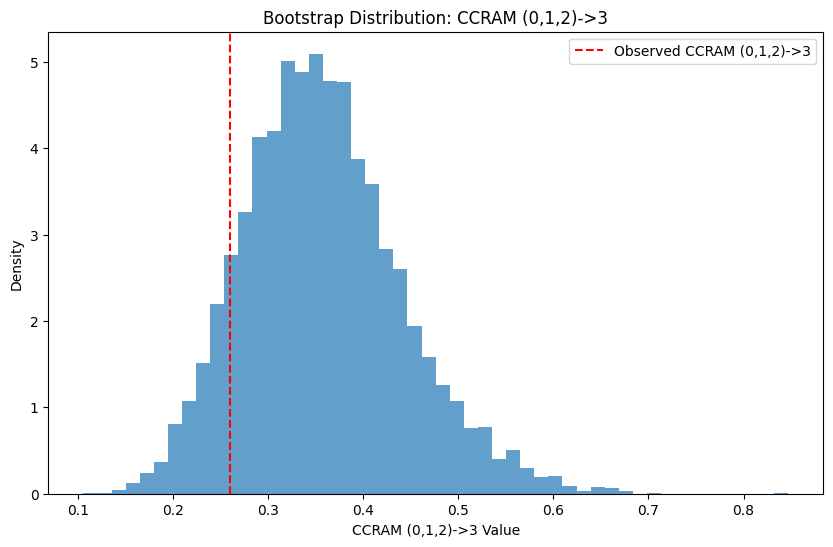

In [21]:
rda_ccram_result.histogram_fig

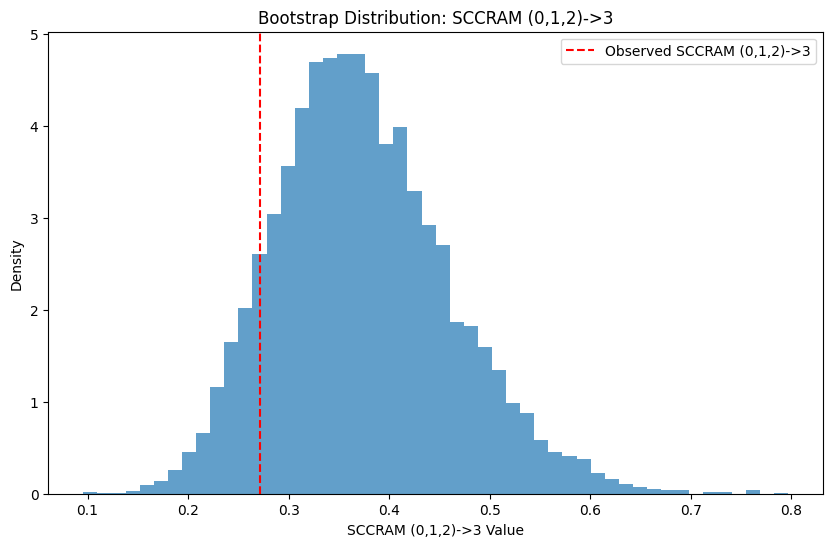

In [22]:
rda_sccram_result = bootstrap_ccram(
    gen_copula=rda_copula,
    from_axes=[0, 1, 2],
    to_axis=3,
    confidence_level=0.95,
    scaled=True,
    method="percentile",
    n_resamples=9999
)

In [23]:
print(f"Metric Name: {rda_sccram_result.metric_name}")
print(f"Observed Value: {rda_sccram_result.observed_value:.4f}")
print(f"95% CI: ({rda_sccram_result.confidence_interval[0]:.4f}, {rda_sccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {rda_sccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(rda_sccram_result.bootstrap_distribution)}")

Metric Name: SCCRAM (0,1,2)->3
Observed Value: 0.2716
95% CI: (0.2241, 0.5635)
Standard Error: 0.0871
Bootstrap Distribution: <class 'numpy.ndarray'>


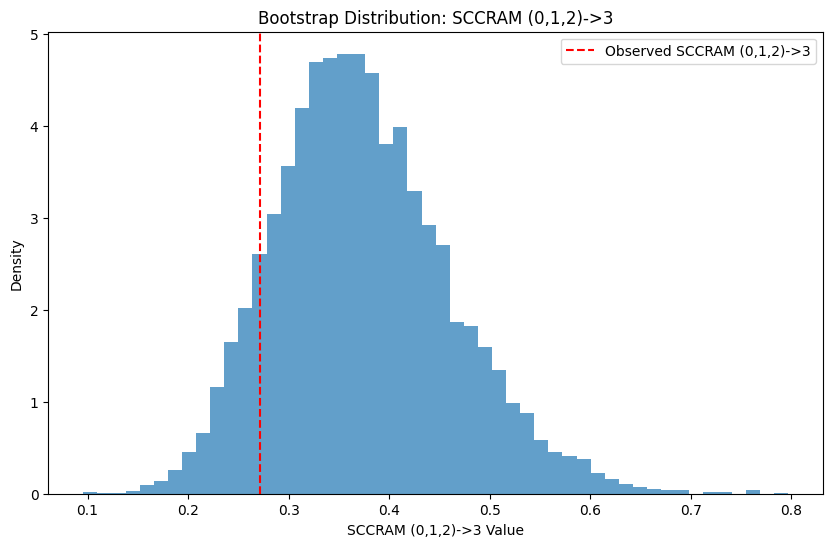

In [24]:
rda_sccram_result.histogram_fig

### Bootstrap Prediction of Categories through Checkerboard Copula Regression

In [25]:
rda_prediction_matrix = bootstrap_predict_category_summary(
    gen_copula=rda_copula,
    from_axes=[0, 1, 2],
    from_axes_names=["X1", "X2", "X3"],
    to_axis=3,
    to_axis_name="Y = X4",
    n_resamples=9999
)
print("\nPrediction Matrix:")
rda_prediction_matrix

/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/numpy/_core/_methods.py:216: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



Prediction Summary (% of bootstrap samples)
--------------------------------------------------------------------------------
           X1=0                                      X1=1                                   
           X2=0          X2=1          X2=2          X2=0          X2=1          X2=2       
           X3=0   X3=1   X3=0   X3=1   X3=0   X3=1   X3=0   X3=1   X3=0   X3=1   X3=0   X3=1
Y = X4=0   1.5%   0.0%   0.1%   0.0%   0.0%   0.2%   0.7%   1.7%   1.9%   0.6%   0.0%   1.7%
Y = X4=1   0.0%   0.0%   0.1%   1.5%   0.0%   0.0%   0.0%   3.4%   0.0%  11.3%   4.4%   3.1%
Y = X4=2   0.0%   0.5%   0.5%  52.0%   3.0%   7.8%   2.3%  16.5%   0.0%  72.4%  76.8%   6.9%
Y = X4=3   0.0%  34.0%   7.2%  46.1%  83.0%  42.7%  43.1%  48.9%  11.5%  15.7%  18.6%  36.2%
Y = X4=4  66.7%  65.3%  70.1%   0.3%  14.1%  46.4%  53.9%  26.4%  86.6%   0.0%   0.2%  52.1%
Y = X4=5  31.8%   0.1%  22.1%   0.0%   0.0%   2.9%   0.0%   3.1%   0.0%   0.0%   0.0%   0.0%
-------------------------------------

X1=0                                                         \
               X2=0                  X2=1                  X2=2              
               X3=0       X3=1       X3=0       X3=1       X3=0       X3=1   
Y = X4=0   1.520152   0.000000   0.070007   0.010001   0.000000   0.170017   
Y = X4=1   0.000000   0.000000   0.120012   1.530153   0.000000   0.000000   
Y = X4=2   0.000000   0.520052   0.520052  52.005201   2.950295   7.770777   
Y = X4=3   0.000000  34.043404   7.150715  46.144614  82.958296  42.724272   
Y = X4=4  66.686669  65.326533  70.057006   0.310031  14.091409  46.404640   
Y = X4=5  31.793179   0.110011  22.082208   0.000000   0.000000   2.930293   

               X1=1                                                         
               X2=0                  X2=1                  X2=2             
               X3=0       X3=1       X3=0       X3=1       X3=0       X3=1  
Y = X4=0   0.650065   1.660166   1.850185   0.630063   0.000000   1.670167  
Y = X4=1   0.000000   3.390339   0.000000  11.291129   4.410441   3.060306  
Y = X4=2   2.280228  16.531653   0.000000  72.427243  76.777678   6.940694  
Y = X4=3  43.124312  48.904890  11.521152  15.651565  18.581858  36.193619  
Y = X4=4  53.945395  26.372637  86.628663   0.000000   0.230023  52.135214  
Y = X4=5   0.000000   3.140314   0.000000   0.000000   0.000000   0.000000

### Permutation Testing for CCRAM & SCCRAM Metrics

/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/scipy/stats/_resampling.py:1498: RuntimeWarning: overflow encountered in scalar power
  n_max = factorial(n_obs_sample)**n_samples


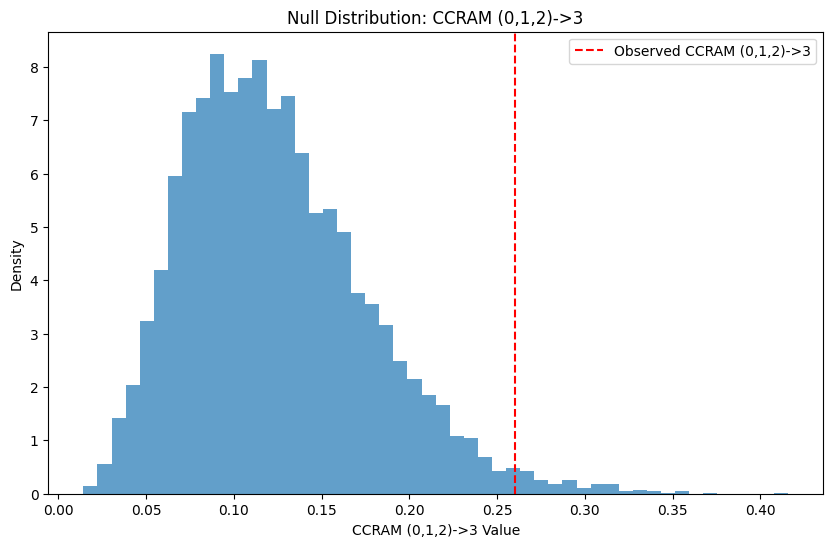

In [26]:
rda_perm_result = permutation_test_ccram(
    gen_copula=rda_copula,
    from_axes=[0, 1, 2],
    to_axis=3,
    alternative='greater',
    n_resamples=9999
)

In [27]:
print(f"Metric Name: {rda_perm_result.metric_name}")
print(f"Observed Value: {rda_perm_result.observed_value:.4f}")
print(f"P-Value: {rda_perm_result.p_value:.4f}")
print(f"Null Distribution: {type(rda_perm_result.null_distribution)}")

Metric Name: CCRAM (0,1,2)->3
Observed Value: 0.2604
P-Value: 0.0160
Null Distribution: <class 'numpy.ndarray'>


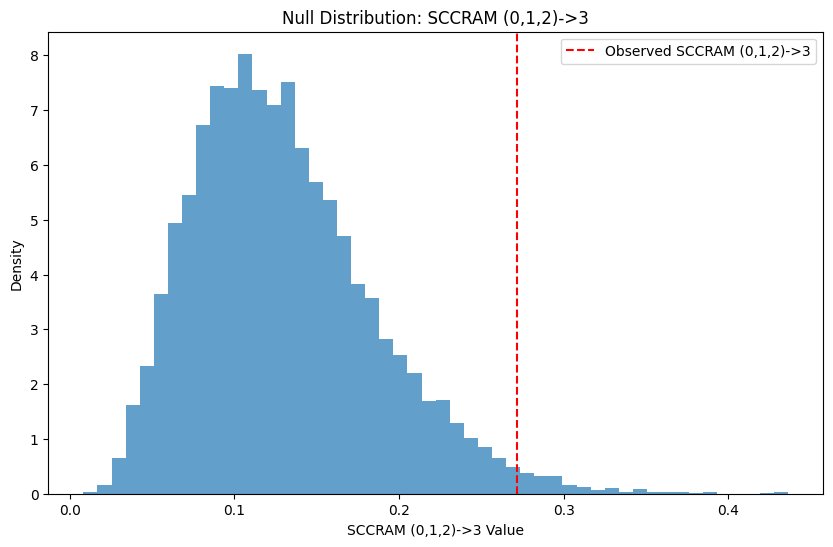

In [28]:
rda_scaled_perm_result = permutation_test_ccram(
    gen_copula=rda_copula,
    from_axes=[0, 1, 2],
    to_axis=3,
    scaled=True,
    alternative='greater',
    n_resamples=9999
)

In [29]:
print(f"Metric Name: {rda_scaled_perm_result.metric_name}")
print(f"Observed Value: {rda_scaled_perm_result.observed_value:.4f}")
print(f"P-Value: {rda_scaled_perm_result.p_value:.4f}")
print(f"Null Distribution: {type(rda_scaled_perm_result.null_distribution)}")

Metric Name: SCCRAM (0,1,2)->3
Observed Value: 0.2716
P-Value: 0.0163
Null Distribution: <class 'numpy.ndarray'>
